## Data exploration
We load the necessary packages, load the data and print some summary statistics about the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [2]:
df = pd.read_csv("practice_parted_1.csv")

c:\users\jaffer\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1274,1275,1276,1277,1278,1279,1280,1281,1282,label
0,176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.117043,0.000000,0.073922,0.000000,0.000000,0.228953,0.131417,CATD_HUMAN,0
1,4725,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119675,0.115619,0.040568,0.109533,0.397566,0.231237,0.000000,0.194726,AMD_HUMAN,0
2,121304016,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.207746,0.200704,0.211268,0.126761,0.172535,0.000000,0.785211,0.676056,Q96DH9_HUMAN,0
3,27350,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.074534,0.089441,0.365217,0.141615,0.277019,0.238509,FGFR3_HUMAN,0
4,3736,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.211470,0.000000,0.071685,0.096774,0.000000,0.000000,0.199821,0.172043,AAPK1_HUMAN,0


In [4]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,1273,1274,1275,1276,1277,1278,1279,1280,1281,label
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.0,2335.0,2335.0,2335.0,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,0.973876,0.940043,0.781156,0.254818,0.0,0.0,0.0,0.0,0.009422,0.983298,...,0.158858,0.116345,0.148151,0.084518,0.083305,0.200876,0.091321,0.211619,0.194758,0.293362
std,0.159539,0.237458,0.413551,0.435852,0.0,0.0,0.0,0.0,0.096629,0.128181,...,0.155495,0.127137,0.150519,0.089184,0.082843,0.162225,0.158752,0.241266,0.168846,0.455400
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.062958,0.000000,0.000000,0.029587,0.037578,0.100000,0.000000,0.000000,0.076934,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.133333,0.108856,0.123913,0.069930,0.070866,0.183178,0.000000,0.183388,0.154291,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.221649,0.190118,0.213884,0.120000,0.116129,0.283706,0.170149,0.310802,0.261759,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


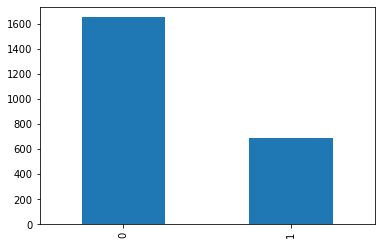

In [5]:
#The dataset is imbalanced. The occurences where the reaction is positive (i.e label = 1) are much less than 0.
df['label'].value_counts().plot(kind = 'bar')

## Synthetic creation of data
Because the data is very little in volume and unbalanced, the following strategy is proposed:
* separate 15% of the data for testing of the algorithm. It will not be used for learning but rather to evaluate how well the model generalizes on new unseen data
* separate another 30% of the rest of the data for validation purposes. This is crucial for the training part and is such a big chunk because we're going to synthetically increase the amount of training data. However, the validation data is used for the optimization of the training loss and it is crucial this data is real
* the rest of the data is synthetically increased in volume by utilizing the SMOTE technique (https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE). First we oversample the minority class by the desired ration and then slightly undersample the majority class as it is stated as best practice and helps for robustness of the training.

In [6]:
#We are splitting the data into train and test chunks. The test sample is 15% of the overall data and it was acquired 
#by performing stratified sampling from the overall data. This means that the ratio of 0 and 1 is kept in the test
#as it is in the main data
np.random.seed(11)
X, x_test, Y, y_test = train_test_split(df.loc[:, df.columns != 'label'], df['label'],
                                        test_size = 0.15, shuffle = True,
                                        random_state = 12,
                                        stratify = df['label']
                                       )

In [7]:
#Split the validation data
X, x_val, Y, y_val = train_test_split(X, Y, 
                                      test_size = 0.3, shuffle = True,
                                      random_state = 12,
                                      stratify = Y
                                      )

In [8]:
# Remove compound and protein names from train, test and validation datasets and store them separately
X_names = X[['0', '1282']]
X = X.drop(['0', '1282'], axis = 1)
x_test_names = x_test[['0', '1282']]
x_test = x_test.drop(['0', '1282'], axis = 1)
x_val_names = x_val[['0', '1282']]
x_val = x_val.drop(['0', '1282'], axis = 1)

In [9]:
#We are performing oversampling by the SMOTE methodology. This means we're artificially creating rows of data
#with label 1 that have similar features to the real data
oversample = SMOTE(sampling_strategy=0.7)
X, Y = oversample.fit_resample(X, Y)

#We are a;sp undersampling the rows with label 0 for regularization purposes.
undersample = RandomUnderSampler(sampling_strategy=0.9)
X, Y = undersample.fit_resample(X, Y)

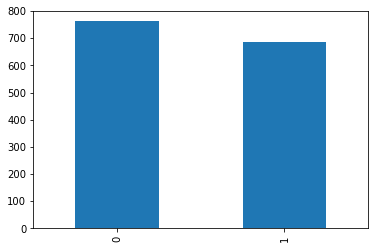

In [10]:
# The dataset is more balanced after over- and undersampling.
Y.value_counts().plot(kind = 'bar')

### Model architecture
It is a deep neural network with 2.7mil parameters and Dropout layers for regularization purposes. 
* Official Keras site: https://keras.io/
* Info on Dropout: https://en.wikipedia.org/wiki/Dropout_(neural_networks)

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(1024, activation = 'relu', input_shape = (1281, )))
model.add(keras.layers.Dense(768, activation = 'relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(rate = 0.5))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              1312768   
_________________________________________________________________
dense_2 (Dense)              (None, 768)               787200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               393728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

### Compiling the model
We use an Adam optimizer and binary crossentropy loss since it's a binary classification problem. The learning rate of the optimizer is important here as it allows Adam to gradually learn and reach optimized state. If the learning rate is big, it might over-reach and "jump over" the desired minima. Infor on Adam: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [12]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-4),
              loss = 'binary_crossentropy',
              metrics = METRICS
             )

### Training the model 
We're training it for 40 epochs, which means there are 40 passes through the data which are used by adam to optimize the loss functuon. The goal is to minimize the loss function; basically the lower the loss function, the closer are the predictions to the thruth. We also define a validation split of 20% which is used for evaluation of the model while it is training and use it to improve the model.

In [13]:
history = model.fit(X, Y, epochs = 40,
                    validation_data = (x_val, y_val)
                   )

Train on 1448 samples, validate on 596 samples
Epoch 1/40
1448/1448 [==============================] - 8s 5ms/step - loss: 0.7149 - tp: 412.0000 - fp: 409.0000 - tn: 353.0000 - fn: 274.0000 - accuracy: 0.5283 - precision: 0.5018 - recall: 0.6006 - auc: 0.5294 - val_loss: 0.6774 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 421.0000 - val_fn: 175.0000 - val_accuracy: 0.7064 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5482
Epoch 2/40
1448/1448 [==============================] - 6s 4ms/step - loss: 0.7134 - tp: 335.0000 - fp: 367.0000 - tn: 395.0000 - fn: 351.0000 - accuracy: 0.5041 - precision: 0.4772 - recall: 0.4883 - auc: 0.5109 - val_loss: 0.6815 - val_tp: 58.0000 - val_fp: 30.0000 - val_tn: 391.0000 - val_fn: 117.0000 - val_accuracy: 0.7534 - val_precision: 0.6591 - val_recall: 0.3314 - val_auc: 0.6484
Epoch 3/40
1448/1448 [==============================] - 7s 5ms/step - loss: 0.7036 - tp: 336.0000 - fp: 371.0000 - tn: 391.0000 - fn: 350.0000 - accuracy: 

Epoch 22/40
1448/1448 [==============================] - 8s 5ms/step - loss: 0.2412 - tp: 645.0000 - fp: 64.0000 - tn: 698.0000 - fn: 41.0000 - accuracy: 0.9275 - precision: 0.9097 - recall: 0.9402 - auc: 0.9644 - val_loss: 0.2910 - val_tp: 145.0000 - val_fp: 34.0000 - val_tn: 387.0000 - val_fn: 30.0000 - val_accuracy: 0.8926 - val_precision: 0.8101 - val_recall: 0.8286 - val_auc: 0.9438
Epoch 23/40
1448/1448 [==============================] - 8s 5ms/step - loss: 0.2433 - tp: 643.0000 - fp: 70.0000 - tn: 692.0000 - fn: 43.0000 - accuracy: 0.9220 - precision: 0.9018 - recall: 0.9373 - auc: 0.9623 - val_loss: 0.3053 - val_tp: 141.0000 - val_fp: 36.0000 - val_tn: 385.0000 - val_fn: 34.0000 - val_accuracy: 0.8826 - val_precision: 0.7966 - val_recall: 0.8057 - val_auc: 0.9438
Epoch 24/40
1448/1448 [==============================] - 7s 5ms/step - loss: 0.2298 - tp: 644.0000 - fp: 73.0000 - tn: 689.0000 - fn: 42.0000 - accuracy: 0.9206 - precision: 0.8982 - recall: 0.9388 - auc: 0.9659 - val_

### Model evaluation
Evaluating the model on the 15% test data that we separated earlier and has not been seen by the model. The result gives us an estimate of how well the model will perform on new data.

In [14]:
print(model.evaluate(x_test, y_test))

351/351 [==============================] - 0s 311us/step
[0.417680236943427, 88.0, 13.0, 235.0, 15.0, 0.9202279448509216, 0.8712871074676514, 0.8543689250946045, 0.932665228843689]


### Classification report
It  shows how well the model performs for each class. We're interested in the measures for 1 and the overall accuracy. Definitions:
* Precision = What proportion of positive identifications was actually correct
* Recall = What proportion of actual positives was identified correctly
* F1-score = The combination of both precision and recall

In [15]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

351/351 [==============================] - 0s 277us/step
loss :  0.417680236943427
tp :  88.0
fp :  13.0
tn :  235.0
fn :  15.0
accuracy :  0.9202279448509216
precision :  0.8712871074676514
recall :  0.8543689250946045
auc :  0.932665228843689

Legitimate Transactions Detected (True Negatives):  235
Legitimate Transactions Incorrectly Detected (False Positives):  13
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  88
Total Fraudulent Transactions:  103


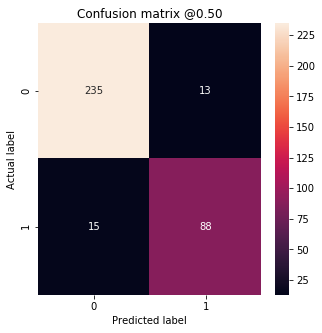

In [16]:
test_predictions_baseline = model.predict_classes(x_test)
baseline_results = model.evaluate(x_test, y_test)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

### Plotting the training and validation accuracy and loss. 
The goal is to maximize accuracy by minimizing the loss. Training and validation accuracy need to go in one direction and with similar slope. This means the model is training well and the validation data is actually used to improve the training.
* While training accuracy increases, validation accuracy stays the same or increases just slightly. This indicates that the model is 'memorizing' more and more the training data but that does not affect how well it might do on new data. The point where the lines cross generally indicates the expected accuracy on new data
* We can notice a similar but inversed pattern for the training and validation loss functions. While the training loss improves, the validation loss actually starts to increase after ~0.30. This does not mean that the model is becoming worse after that point but rather that it "is less sure about the prediction even if it's true"
These patterns indicate that the data we're using for training is just not enough for good accuracy (closer to 100%), even with data augmentation.

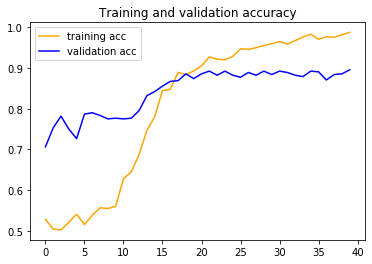

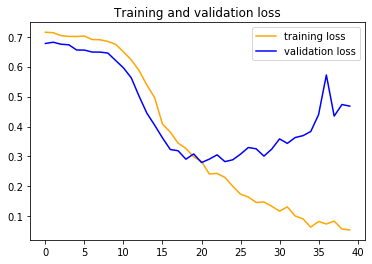

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
#Saving the model locally
model.save('40ep-092acc-085pre-086rec-086f1_2.h5')

### Plot additional metrics
Below we define a function that plots loss, AUC, precision and recall

In [20]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = [15, 10]
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

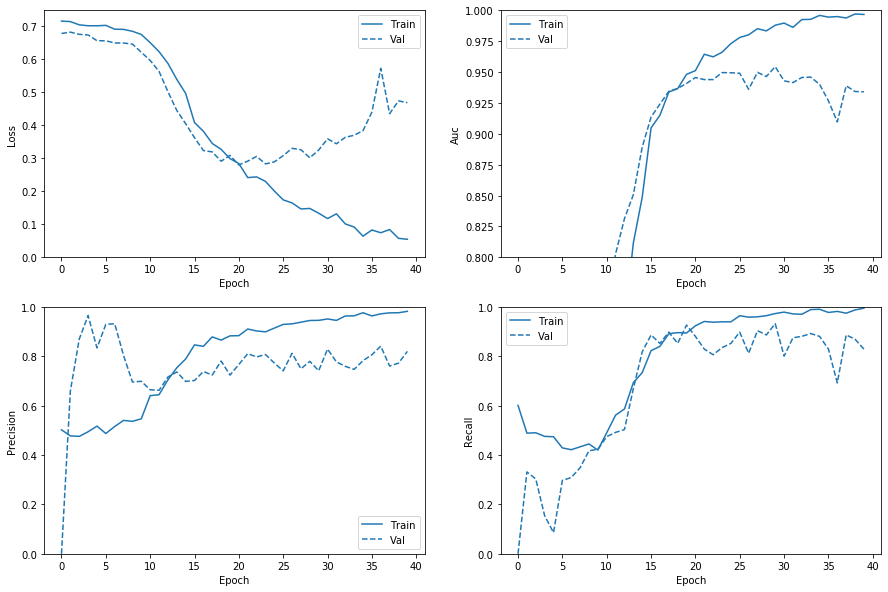

In [21]:
plot_metrics(history)

In [25]:
import keras_metrics as km

### Loading the model
The below code loads the model from a local file that is in the same directory. If it somewhere else, you need to specify the path. After that, you are able to call its .predict or .predict_classes methods as usual.

In [35]:
model = keras.models.load_model('40ep-092acc-085pre-086rec-086f1.h5', compile = False)

In [36]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-4),
              loss = 'binary_crossentropy',
              metrics = METRICS
             )

351/351 [==============================] - 0s 852us/step
loss :  0.417680236943427
tp :  88.0
fp :  13.0
tn :  235.0
fn :  15.0
accuracy :  0.9202279448509216
precision :  0.8712871074676514
recall :  0.8543689250946045
auc :  0.932665228843689

Legitimate Transactions Detected (True Negatives):  235
Legitimate Transactions Incorrectly Detected (False Positives):  13
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  88
Total Fraudulent Transactions:  103


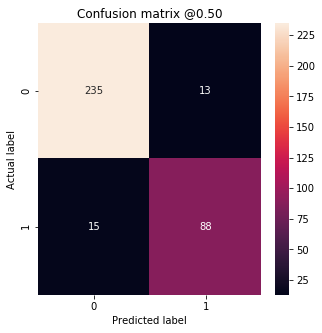

In [37]:
# Generate the same classification report and confusion matrix as above to confirm the model was loaded and evaluated
# successfully
test_predictions_baseline = model.predict_classes(x_test)
baseline_results = model.evaluate(x_test, y_test)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

### Output file
We're using the previously stored names of proteins and compounds x_test_names (we create this data in the beginning where we set it aside from the training data). To that data we append the predicted classes from the model, their probabilities and actual class.

This sequence can be used with a new dataset as well. It just needs to be loaded as a pandas dataframe.

In [38]:
x_test_names['Prediction'] = model.predict_classes(x_test)
x_test_names['Probabilities'] = model.predict_proba(x_test)
x_test_names['True label'] = y_test
print(x_test_names)
x_test_names.to_csv('predictions1.csv')

             0            1282  Prediction  Probabilities  True label
256    6435415     PGFRB_HUMAN           0   8.544177e-12           0
626      65016      CATD_HUMAN           0   1.385337e-06           0
1983   5281040          6LU7:A           1   9.946743e-01           1
609      10239     CAC1A_HUMAN           0   9.823133e-03           0
837      68827     CP3A7_HUMAN           0   1.459214e-04           0
...        ...             ...         ...            ...         ...
2002    446541    Q5K672_HUMAN           1   9.991989e-01           1
980   54675769    Q96PP0_HUMAN           0   1.911860e-08           0
644     151075      JAK2_HUMAN           0   1.337213e-07           0
1821      5291     ACVL1_HUMAN           1   9.996686e-01           1
1803     42890  YP_009725307.1           1   9.747351e-01           1

[351 rows x 5 columns]
